In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

input_dir='/kaggle/input/local-pc-performance-indicators/'



# Open CSV file and load data into DataFrame
data = pd.read_csv(input_dir+'local.CSV', encoding='latin-1', decimal='.', thousands=',')
# Remove leading/trailing whitespace and special characters (like BOM) from column names
data.columns = data.columns.str.strip().str.replace('\ufeff', '', regex=False)

# Show the first few rows of the DataFrame
print(data)
print('-----------------------------------------------------')
print(f"\nColumn names: {data.columns[:5].tolist()}")  # Print first 5 column names to verify


           Date          Time          Virtual Memory Committed [MB]  \
0     25.1.2026  12:36:10.755                                  16979   
1     25.1.2026  12:36:12.750                                  16935   
2     25.1.2026  12:36:14.763                                  16924   
3     25.1.2026  12:36:16.764                                  16928   
4     25.1.2026  12:36:18.768                                  16917   
...         ...           ...                                    ...   
5019  25.1.2026  15:23:52.928                                  17192   
5020  25.1.2026  15:23:54.915                                  17180   
5021  25.1.2026  15:23:56.927                                  17176   
5022       Date          Time          Virtual Memory Committed [MB]   
5023        NaN           NaN  System: ASUS ASUS V16 V3607VM_V3607VM   

              Virtual Memory Available [MB]  \
0                                     18456   
1                                     184

/tmp/ipykernel_55/2595015501.py:11: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,281,282,283,284,285,286,287,288,289,290,294,295,296,297,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,347,348,349

In [2]:
# Filter columns to keep only the relevant metrics
columns_to_keep = [
    'Potenza totale CPU [W]',
    "CPU Package Power [W]",
    'Potenza Core IA [W]',
    "IA Cores Power [W]",
    'VR VCC Corrente (SVID IOUT) [A]',
    "VR VCC Current (SVID IOUT) [A]"
    'GPU Potenza [W]',
    "GPU Power [W]",
    'IGPU Potenza [W]',
    "IGPU Power [W]"
    'Potenza DRAM totale [W]',
    'Consumo energetico resto del chip [W]',
    'Rest-of-Chip Power [W]'
]

# Keep only columns that exist in the DataFrame
existing_columns = [col for col in columns_to_keep if col in data.columns]
data_filtered = data[existing_columns]

# Convert all columns to numeric values, handling errors
for col in data_filtered.columns:
    data_filtered[col] = pd.to_numeric(data_filtered[col], errors='coerce')

# Replace NaN values with 0
data_filtered = data_filtered.fillna(0)

print(data_filtered)
print("-------------------")
print(data_filtered.dtypes)

      CPU Package Power [W]  IA Cores Power [W]  GPU Power [W]  \
0                    10.906               6.699          3.563   
1                    11.398               7.318          3.518   
2                    12.701               8.588          3.552   
3                    15.603              11.160          3.571   
4                     7.780               3.900          3.529   
...                     ...                 ...            ...   
5019                 13.786               9.850          3.638   
5020                 11.006               7.100          3.622   
5021                 13.985              10.049          3.629   
5022                  0.000               0.000          0.000   
5023                  0.000               0.000          0.000   

      Rest-of-Chip Power [W]  
0                      0.163  
1                      0.153  
2                      0.164  
3                      0.226  
4                      0.128  
...                  

/tmp/ipykernel_55/2209768262.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[col] = pd.to_numeric(data_filtered[col], errors='coerce')


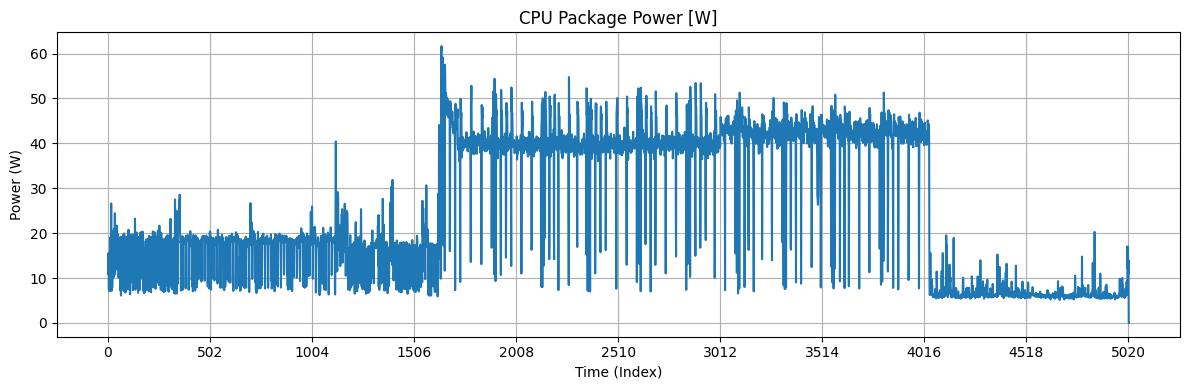

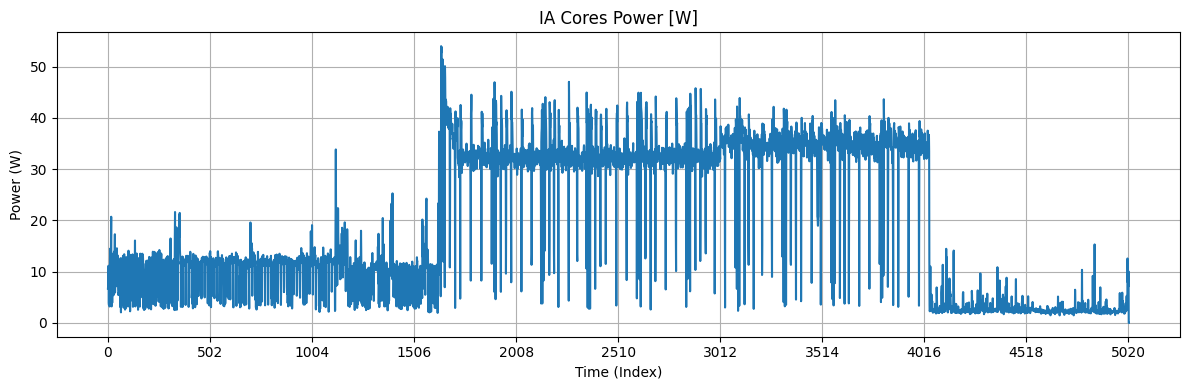

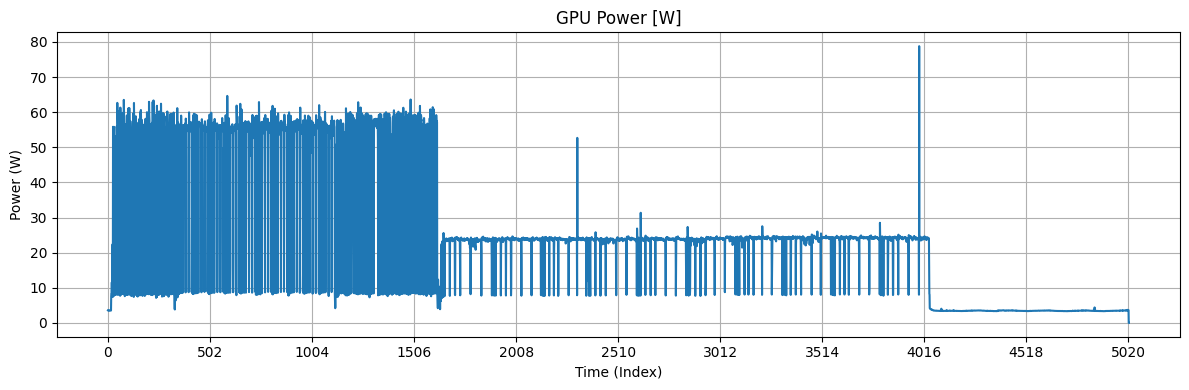

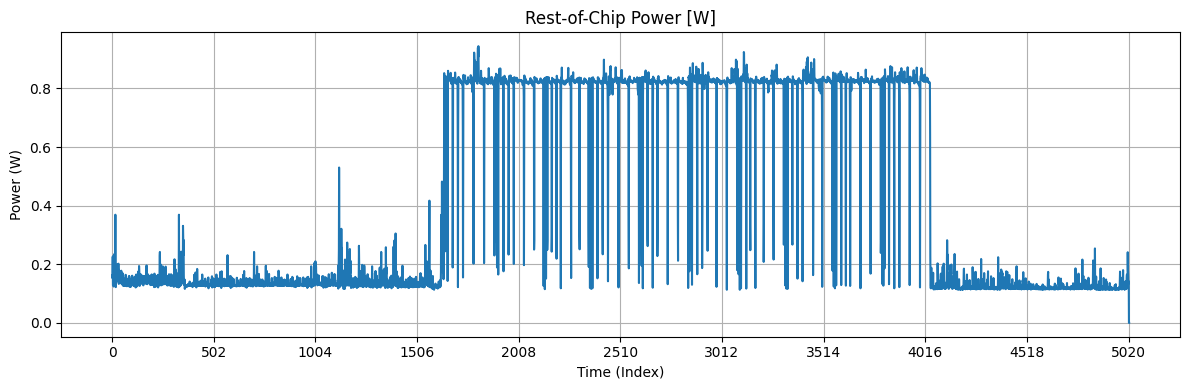

In [3]:

# Plot each metric in a separate subplot for better readability
# Plot each metric in a separate figure
for column in data_filtered.columns:
    plt.figure(figsize=(12, 4))
    plt.plot(data_filtered.index, data_filtered[column], label=column)
    plt.ylabel('Power (W)')
    plt.xlabel('Time (Index)')
    plt.title(column)
    plt.grid(True)
    # Show only 10 evenly spaced x-axis labels
    step = max(1, len(data_filtered) // 10)
    plt.xticks(np.arange(0, len(data_filtered), step))
    plt.tight_layout()

plt.show()

In [4]:
import json

# Convert the first two time-related columns to datetime
# Combine Date and Time columns to create a datetime column
data_filtered['timestamp'] = pd.to_datetime(
    data['Date'] + ' ' + data['Time'],
    format='%d.%m.%Y %H:%M:%S.%f',
    errors='coerce'
)

print(f"\nCSV time range (corrected): {data_filtered['timestamp'].min()} to {data_filtered['timestamp'].max()}")

# Load JSON benchmark data
json_file = input_dir+'benchmark_liquid_lfm2.5-1.2b_20260125_123635.json'
with open(json_file, 'r', encoding='utf-8') as f:
    benchmark_data = json.load(f)

# Extract request data and timestamps from JSON
request_events = []
if 'results' in benchmark_data:
    for entry in benchmark_data['results']:
        request_events.append({
            'timestamp_send': pd.to_datetime(entry['timestamp_send']),
            'timestamp_response': pd.to_datetime(entry['timestamp_response']),
            'total_tokens': entry.get('total_tokens', 0),
            'elapsed_time': entry.get('elapsed_time_seconds', 0),
            'size_category': entry.get('size_category', 'unknown')
        })

# Convert to DataFrame
request_df = pd.DataFrame(request_events)

if len(request_df) > 0:
    print(f"\nJSON time range: {request_df['timestamp_send'].min()} to {request_df['timestamp_send'].max()}")
    print(f"Total requests: {len(request_df)}")
    
    # Get the first timestamp_send and last timestamp_response from JSON
    first_json_timestamp = request_df['timestamp_send'].min()
    last_json_timestamp = request_df['timestamp_response'].max()
    print(f"\nFirst timestamp_send in JSON: {first_json_timestamp}")
    print(f"Last timestamp_response in JSON: {last_json_timestamp}")
    
    # Filter CSV data to show only from first request send to last response
    data_filtered = data_filtered[
        (data_filtered['timestamp'] >= first_json_timestamp) & 
        (data_filtered['timestamp'] <= last_json_timestamp)
    ].copy()
    print(f"CSV data filtered to {len(data_filtered)} rows (from first request to last response)")
    
    # For each request, find the closest CSV measurement
    request_df['csv_index'] = request_df['timestamp_send'].apply(
        lambda req_time: (data_filtered['timestamp'] - req_time).abs().idxmin() 
        if pd.notna(data_filtered['timestamp']).any() else None
    )
    
    # Get the closest timestamp for each request
    request_df['closest_csv_time'] = request_df['csv_index'].apply(
        lambda idx: data_filtered.loc[idx, 'timestamp'] if idx is not None else None
    )
    
    request_df['time_diff_seconds'] = (request_df['timestamp_send'] - request_df['closest_csv_time']).dt.total_seconds()
    
    print(f"\nTime difference statistics (seconds):")
    print(request_df['time_diff_seconds'].describe())


CSV time range (corrected): 2026-01-25 12:36:10.755000 to 2026-01-25 15:23:56.927000

JSON time range: 2026-01-25 12:36:45.548015 to 2026-01-25 12:46:53.400503
Total requests: 90

First timestamp_send in JSON: 2026-01-25 12:36:45.548015
Last timestamp_response in JSON: 2026-01-25 12:47:00.836818
CSV data filtered to 307 rows (from first request to last response)

Time difference statistics (seconds):
count    90.000000
mean     -0.024763
std       0.577763
min      -1.319985
25%      -0.494223
50%      -0.026304
75%       0.477297
max       0.933133
Name: time_diff_seconds, dtype: float64


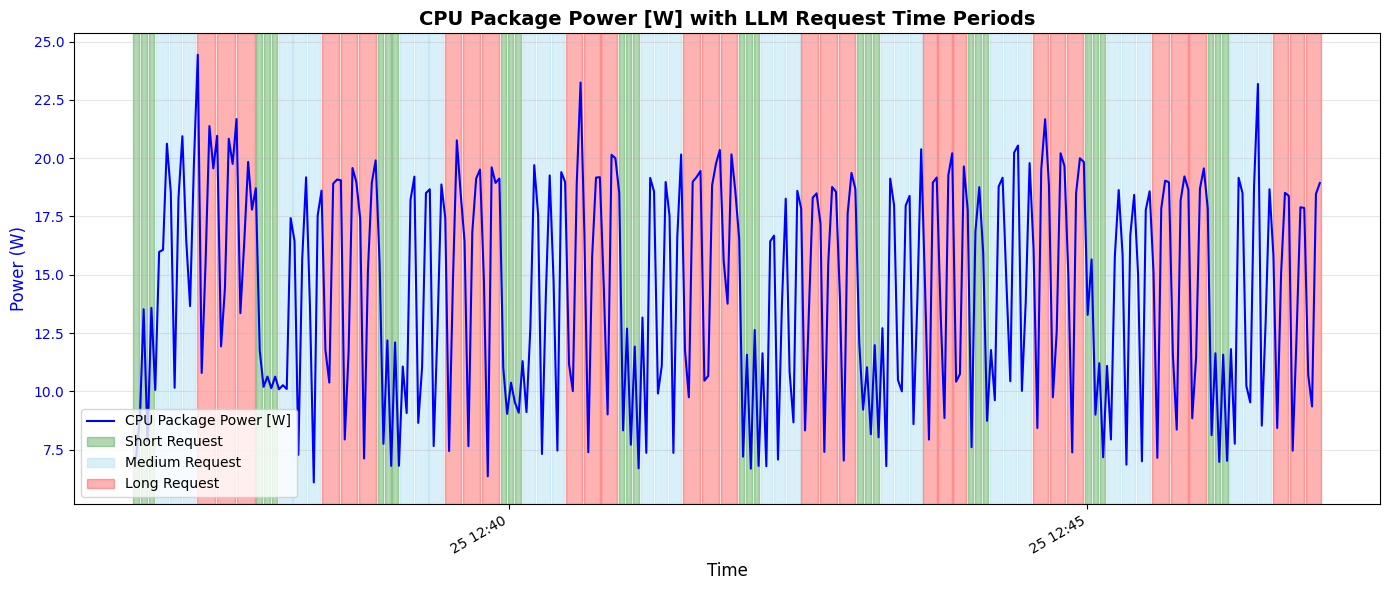

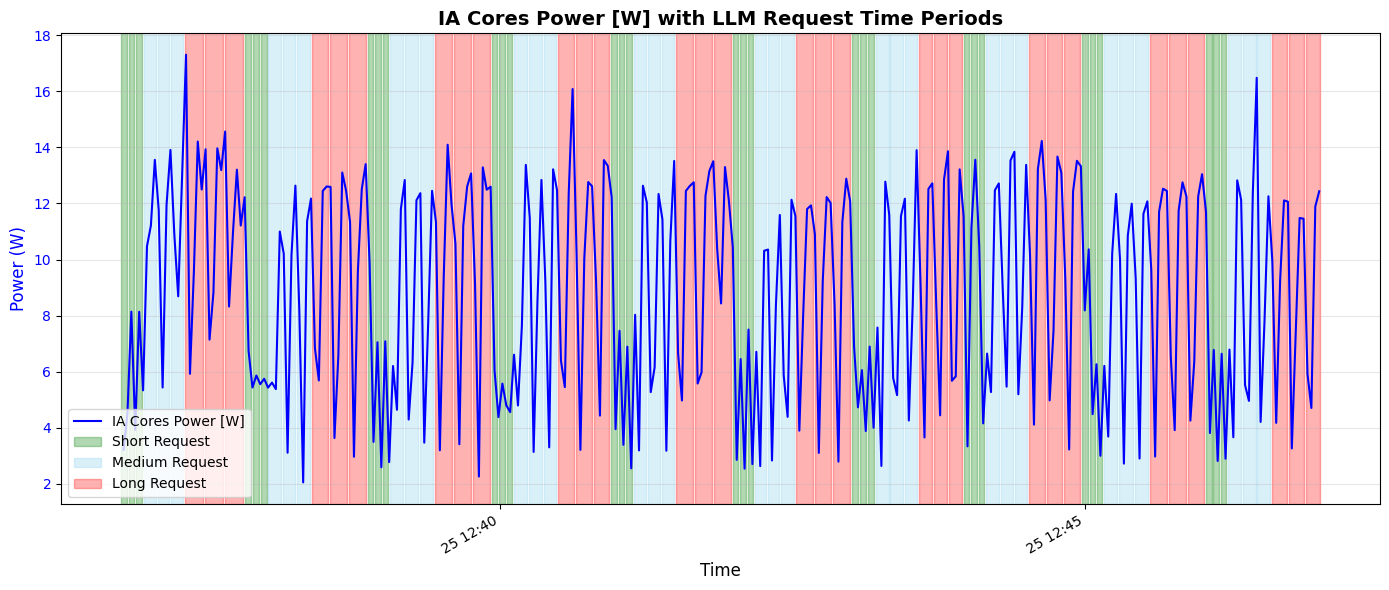

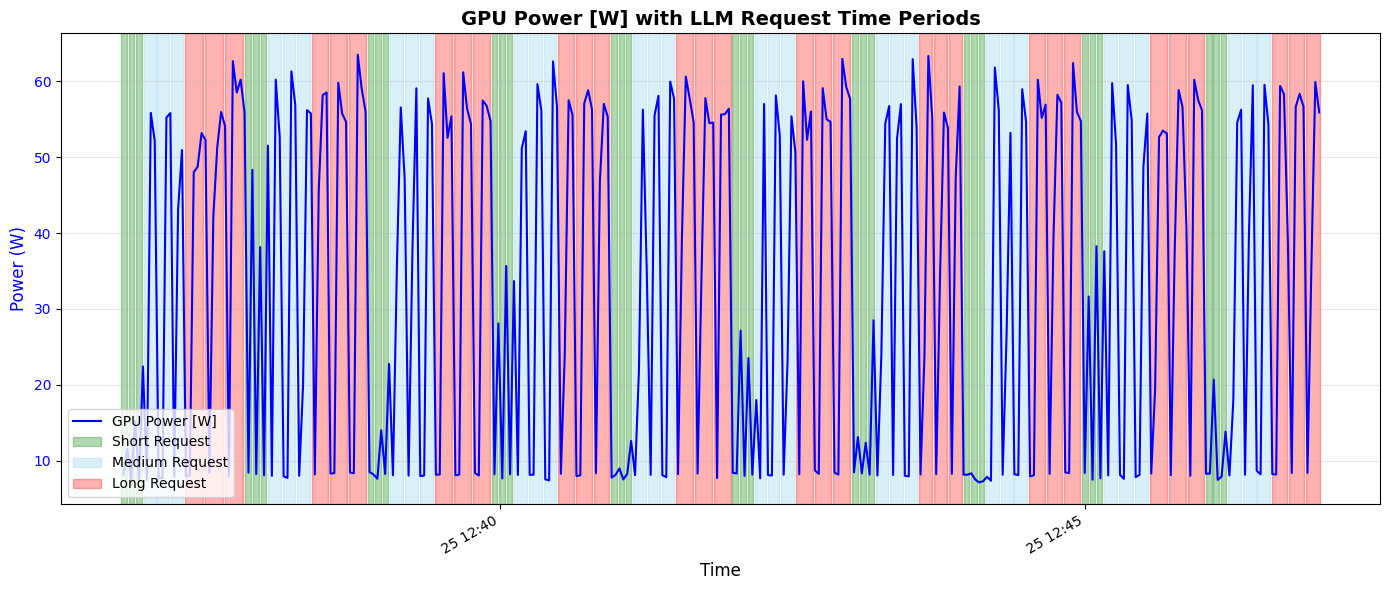

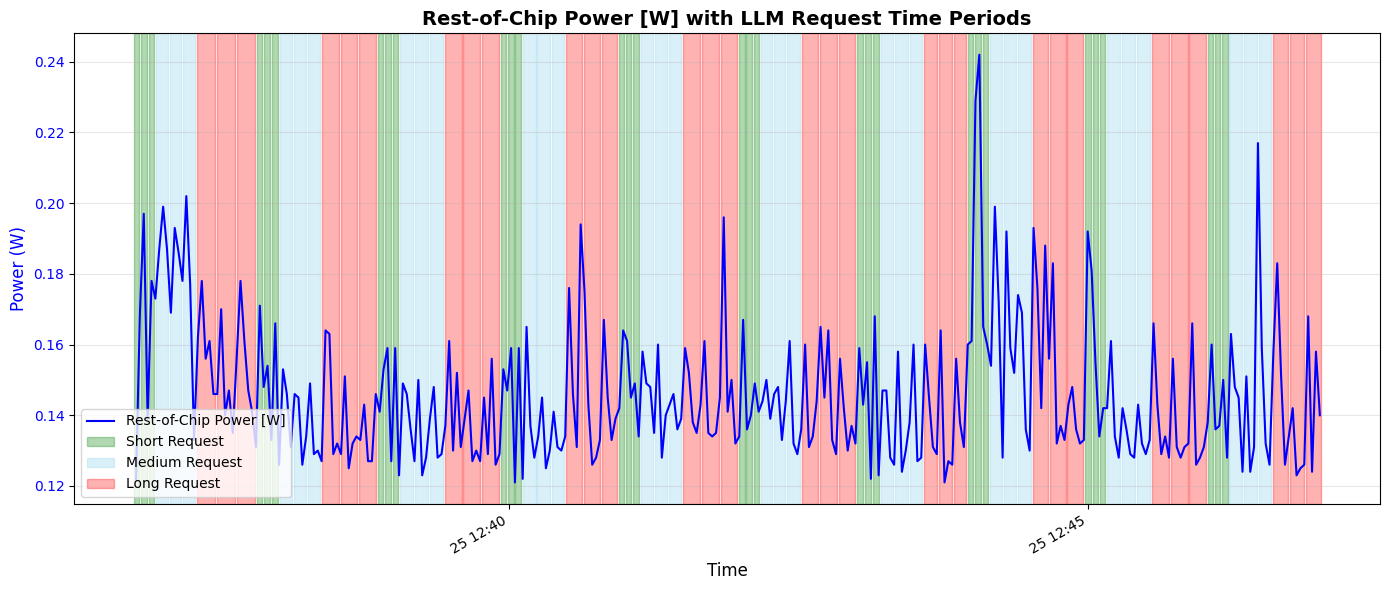

In [5]:

# Define colors for each category
category_colors = {
    'short': 'green',
    'medium': 'skyblue',
    'long': 'red',
}

# Plot power metrics with request time bands
for column in existing_columns:
    plt.figure(figsize=(14, 6))
    
    # Plot power data vs timestamp
    ax1 = plt.gca()
    ax1.plot(data_filtered['timestamp'], data_filtered[column], label=column, color='blue', linewidth=1.5)
    ax1.set_ylabel('Power (W)', color='blue', fontsize=12)
    ax1.set_xlabel('Time', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True, alpha=0.3)
    
    # Add time bands for each request
    if len(request_df) > 0:
        # Track which categories have been added to legend
        added_to_legend = set()
        
        for idx, row in request_df.iterrows():
            category = row['size_category']
            color = category_colors.get(category, 'lightgray')
            label = f'{category.capitalize()} Request' if category not in added_to_legend else None
            
            # Draw vertical span from timestamp_send to timestamp_response
            ax1.axvspan(row['timestamp_send'], row['timestamp_response'], 
                       alpha=0.3, color=color, label=label)
            
            if label:
                added_to_legend.add(category)
    
    plt.title(f'{column} with LLM Request Time Periods', fontsize=14, fontweight='bold')
    ax1.legend(loc='lower left')
    
    # Format x-axis for better readability
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

plt.show()

In [6]:
data_filtered['csv_index']=data_filtered.index
result=data_filtered.merge(request_df, on='csv_index', how='left')
result['GPU energy [Joule]']=result['GPU Power [W]']*result['elapsed_time']
result['CPU Package Power energy [Joule]']=result['CPU Package Power [W]']*result['elapsed_time']
result['Total energy [Joule]']=result['GPU energy [Joule]']+result['CPU Package Power energy [Joule]']

In [7]:
# data_filtered
result
# request_df

,CPU Package Power [W],IA Cores Power [W],GPU Power [W],Rest-of-Chip Power [W],timestamp,csv_index,timestamp_send,timestamp_response,total_tokens,elapsed_time,size_category,closest_csv_time,time_diff_seconds,GPU energy [Joule],CPU Package Power energy [Joule],Total energy [Joule]
0,7.132,3.217,8.146,0.122,2026-01-25 12:36:46.868,18,2026-01-25 12:36:45.548015,2026-01-25 12:36:48.495962,165.0,2.948,short,2026-01-25 12:36:46.868,-1.319985,24.014408,21.025136,45.039544
1,8.804,4.512,11.551,0.169,2026-01-25 12:36:48.874,19,2026-01-25 12:36:49.496730,2026-01-25 12:36:52.435759,165.0,2.939,short,2026-01-25 12:36:48.874,0.622730,33.948389,25.874956,59.823345
2,13.522,8.140,7.513,0.197,2026-01-25 12:36:50.868,20,NaT,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,7.881,3.925,15.229,0.139,2026-01-25 12:36:52.869,21,2026-01-25 12:36:53.436269,2026-01-25 12:36:56.327559,165.0,2.891,short,2026-01-25 12:36:52.869,0.567269,44.027039,22.783971,66.811010
4,13.581,8.136,7.466,0.178,2026-01-25 12:36:54.887,22,NaT,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,17.867,11.455,56.649,0.126,2026-01-25 12:46:52.364,320,NaT,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
303,10.708,5.914,8.389,0.168,2026-01-25 12:46:54.394,321,2026-01-25 12:46:53.400503,2026-01-25 12:47:00.836818,929.0,7.436,long,2026-01-25 12:46:54.394,-0.993497,62.380604,79.624688,142.005292
304,9.355,4.706,35.389,0.124,2026-01-25 12:46:56.386,322,NaT,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
305,18.468,11.892,59.897,0.158,2026-01-25 12:46:58.404,323,NaT,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [10]:
result.groupby('size_category').mean().drop(['csv_index','timestamp',
                                             'timestamp_send','timestamp_response','closest_csv_time'],axis=1)

,CPU Package Power [W],IA Cores Power [W],GPU Power [W],Rest-of-Chip Power [W],total_tokens,elapsed_time,time_diff_seconds,GPU energy [Joule],CPU Package Power energy [Joule],Total energy [Joule]
size_category,,,,,,,,,,
long,17.616133,11.416700,29.0014,0.147367,1067.300000,8.287367,-0.056768,239.699366,146.539402,386.238768
medium,15.847700,10.005900,24.3780,0.146000,750.633333,6.397967,-0.003586,156.066580,101.383066,257.449645
short,12.872167,7.676633,20.8429,0.147567,152.400000,2.855100,-0.013936,59.434914,36.575287,96.010200
